# 8.1 Binomial Coefficients

\begin{align}
    & C(p,N) + C(p, N-1) \\
    =\ & 2 \sum^{N-1}_{k=0}{{p-1}\choose{k}} + 2 \sum^{N-2}_{k=0}{{p-1}\choose{k}} \\
    =\ & 2 \sum^{N-1}_{k=0}{{p-1}\choose{k}} + 2 \sum^{N-1}_{k=1}{{p-1}\choose{k-1}} \\
    =\ & 2 \sum^{N-1}_{k=0}{{p-1}\choose{k}} + 2 \sum^{N-1}_{k=0}{{p-1}\choose{k-1}} - 2\underbrace{2 {p-1}\choose{0-1}}_{0} \\
    =\ & 2 \sum^{N-1}_{k=0}{ [{{p-1}\choose{k}} + {{p-1}\choose{k-1}}] } \\
    \overset{(2)}{=}\ & 2 \sum^{N-1}_{k=0}{ {{p}\choose{k}} } \\
    =\ & C(p+1,N)
\end{align}

# 8.2 Geometry of Linear Classification

In [24]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as pp
%matplotlib inline
%autocall 1

Automatic calling is: Smart


/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


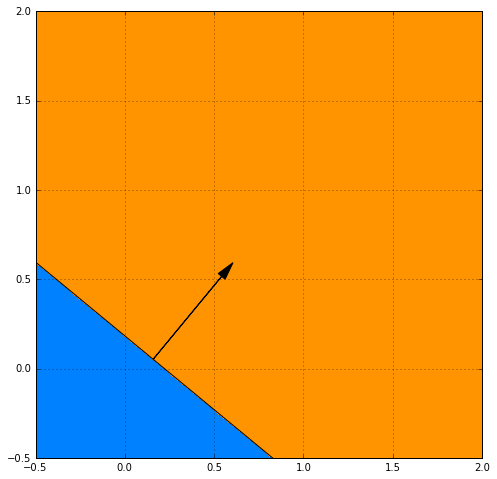

In [112]:
def visualize_binary_classifier():
    while True:
        w = np.random.rand(2)/2
        b = np.random.rand(1)[0]/2

        X = np.linspace(-0.5, 2, 2)
        # from solving w.T.dot(x) - b == 0 for x1 (which is Y)
        Y = (-w[0]*X + b)/w[1]
        
        # get a base for the arrow
        x = np.random.rand(1)[0]
        y = (-w[0]*x + b)/w[1]
        
        # if the base for the arrow is nice, proceed, otherwise generate everything anew
        if y < 1 and y > 0:
            pp.figure(figsize=(8,8))
            pp.arrow(x, y, w[0], w[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
            pp.xlim(-0.5, 2)
            pp.ylim(-0.5, 2)
            pp.grid()
            
            # plot analytically found decision boundary
            pp.plot(X, Y, color="black", lw=1)

            # plot empirical decision boundary
            n = 500
            X = np.array(np.mgrid[-0.5:2:2.5/n, -0.5:2:2.5/n]).reshape(2,n**2)
            Z = np.sign(w.T.dot(X) - b)
            pp.contourf(X[0,:].reshape(n,n), X[1,:].reshape(n,n), Z.reshape(n,n), 1)
            break
    return

visualize_binary_classifier()

**(a)** The decision boundary is a hyperplane defined by $(w, b)$. $w$ decides the orientation, $b$ the offset from the origin.

**(b)** 
The *shattering coefficient*
The *VC-dimension*

# 8.3 The primal SRM problem

# 8.4 The dual problem for the Support Vector Machine

# 8.5 Kernel Construction